In [1]:
# import imutils
# from PIL import Image
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

In [2]:
# get image and file names
images_and_name = [(cv2.imread(file, cv2.IMREAD_GRAYSCALE), file) for file in glob.glob('../images/captcha_images/vtop_captcha/*.png')]

In [3]:
# split images and names in seperate lists
images_and_name = images_and_name[:30]
images = [image for image, _ in images_and_name]
paths = [name[:-4] for _, name in images_and_name]

In [4]:
# get name of images
names = []
for path in paths: names.append(path[-6:].upper())
names

['276WTL',
 '3375MC',
 '3GYNI7',
 '53VG1C',
 '6KSG5M',
 '74NQT8',
 'B1DY3V',
 'CRDIJ2',
 'CU3NAV',
 'D5DHAQ',
 'DAFBK3',
 'J41MK3',
 'J5DD95',
 'KDFYTC',
 'KEDEH5',
 'MS35RZ',
 'P173FZ',
 'QPI2PJ',
 'QUK4T8',
 'R8CFTA',
 'R8L128',
 'S9FBL9',
 'SABHYB',
 'TFEWPE',
 'TLFF7P',
 'TSULL6',
 'UZZBKE',
 'WR3ZQ4',
 'XGC46E',
 'XQT94N']

In [5]:
def plot_images(images) -> None:
    fig = plt.figure(figsize=(15, 40))
    rows, columns = len(images)//2 + 1, 2
    for i, image in enumerate(images): 
        # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, i+1)
    
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(names[i])
        plt.imshow(image, cmap='gray')
    plt.show()

In [6]:
# plot_images(images=images)

In [7]:
def standered_image(image):	
	width = 1000
	height = int(3.6*width) 
	# resize image
	image_resized = cv2.resize(image, (height, width), interpolation = cv2.INTER_AREA)
	return image_resized

In [8]:
def connected_components(image):
	# convert to binary by thresholding
	_, binary_map = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

	# do connected components processing
	nlabels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_map, None, None, None, 8, cv2.CV_32S)

	#get CC_STAT_AREA component as stats[label, COLUMN] 
	areas = stats[1:,cv2.CC_STAT_AREA]

	result = np.zeros((labels.shape), np.uint8)

	for i in range(0, nlabels - 1):
		if areas[i] >= 100:   #keep
			result[labels == i + 1] = 255

	# cv2.imshow("Binary", binary_map)
	# cv2.imshow("Result", result)
	return result

In [9]:
# images = [standered_image(image) for image in images]

In [10]:
def resize_image(image, scale_percent):	
	width = int(image.shape[1] * scale_percent / 100)
	height = int(image.shape[0] * scale_percent / 100)
	dim = (width, height)
	
	# resize image
	image_resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
	return image_resized

In [11]:
def apply_filters(image):
    # binarize image
    (thresh, image_bin) = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
    
    # erode image
    image_neg = cv2.bitwise_not(image_bin)
    image_erd = cv2.erode(image_neg, np.ones(shape=(3, 3)), iterations=2)
    image_neg2 = cv2.bitwise_not(image_erd)
    
    return image_neg2

In [12]:
def apply_filters2(image):
    # binarize image
    (thresh, image_bin) = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
    
    # erode image
    image_neg = cv2.bitwise_not(image_bin)
    image_erd = cv2.erode(image_neg, np.ones(shape=(3, 3)), iterations=2)
    
    # resize image
    image_resized = resize_image(image_erd, 250)
    
    # dilate image
    image_dil = cv2.dilate(image_resized, np.ones(shape=(5, 5)), iterations=1)
    image_erd2 = cv2.erode(image_dil, np.ones(shape=(3, 3)), iterations=2)
    
    # gaussin
    image_blur = cv2.GaussianBlur(image_erd2, (3, 3), 0)
    (thresh, image_bin) = cv2.threshold(image_blur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
    # image_erd = cv2.erode(image_bin, np.ones(shape=(3, 3)), iterations=1)
    image_resized = resize_image(image_bin, 40)
    image_conn = connected_components(image_resized)
    image_neg2 = cv2.bitwise_not(image_conn)
    
    # # median filter to blur
    # image_median = cv2.medianBlur(image_bin, 5)
    
    # # gaussian filter
    # image_gauss = cv2.
    
    return image_neg2

In [13]:
def apply_filters3(image):
    # binarize image
    (thresh, image_bin) = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    image_resized = resize_image(image_bin, 200)
     
    
    # erode image
    image_neg = cv2.bitwise_not(image_resized)
    image_resized = resize_image(image_neg, 200)
    image_erd = cv2.erode(image_resized, np.ones(shape=(3, 3)), iterations=2)
    
    # # median filter to blur
    image_median = cv2.medianBlur(image_erd, 5)
    image_conn = connected_components(image_median)
    
    # gaussin
    image_blur = cv2.GaussianBlur(image_conn, (3, 3), 0)
    (thresh, image_bin) = cv2.threshold(image_blur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
    
    image_neg2 = cv2.bitwise_not(image_bin)
    
    return image_neg2

In [14]:
final_images = []
for image in images: final_images.append(apply_filters3(image=image))

c:\Users\dhair\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


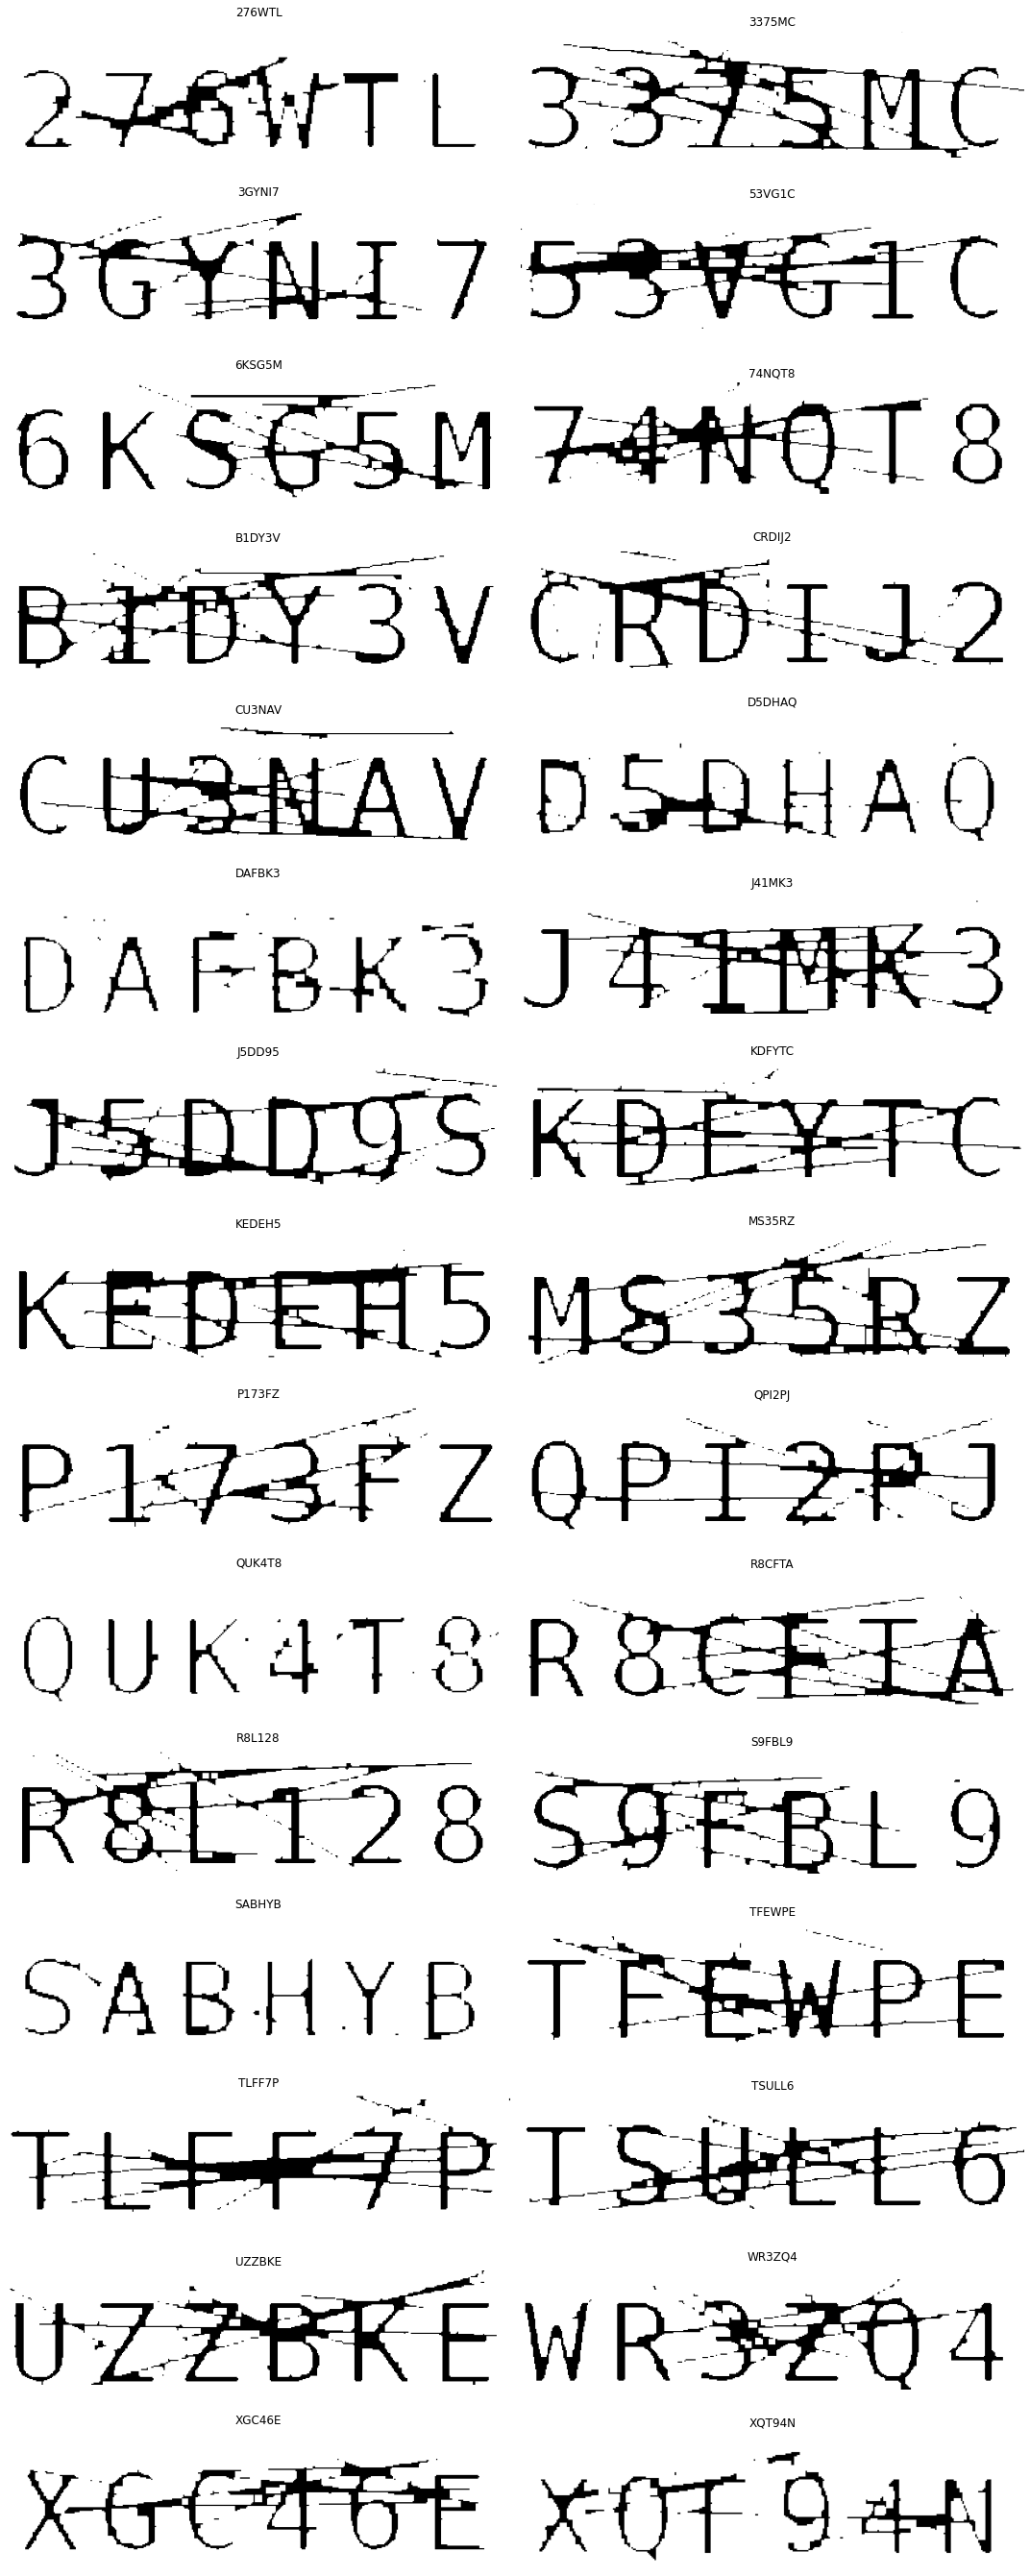

In [15]:
plot_images(images=final_images)

In [18]:
final_images[0].shape

(101, 350)

In [16]:
pred_names =[]
for i, image in enumerate(final_images):
    text = pytesseract.image_to_string(image)
    text = text.strip()
    pred_names.append(text)
    # print(f'|{text}|{names[i].upper()}|')

In [17]:
tp = 0.0
total = len(pred_names)
for i in range(len(pred_names)): 
    if pred_names[i] == names[i]:
        print(f'|{pred_names[i]}|{names[i].upper()}|')
        tp+=1

acc = (tp/total)*100
print(f'Accuracy: {acc:.2f}%')

|DAFBK3|DAFBK3|
|SABHYB|SABHYB|
Accuracy: 6.67%


In [19]:
OUTPUT_DIR = '../vtop_captcha_preprocessed/'
os.mkdir(OUTPUT_DIR)
os.chdir(OUTPUT_DIR)
os.listdir(OUTPUT_DIR)

[]

In [20]:
for i,image in enumerate(final_images): cv2.imwrite(names[i] + '.png', image)
len(os.listdir(OUTPUT_DIR))

30